# ATAC seq analysis

Assay for Transposase-Accessible Chromatin

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import quantile_normalize

## Analyzing Peaks

In [4]:
peaks = pd.read_csv("../data/psd.bulk.zfish_atac.10hpf.lg1x.csv")

In [5]:
peaks.head()

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
0,4.612648,5.204557,3.391132,4.552681,3.668004,4.766655,4.012215,4.486644,4.463738,4.861570,3.614023,3.696712,3.210026,4.679626,4.277916
1,4.721959,5.358137,3.557652,4.688727,3.546239,4.748463,4.012215,4.399901,4.690443,4.848311,3.776074,3.959122,3.531244,4.750276,4.439449
2,4.806994,5.338711,3.360469,4.163852,3.668004,4.955051,4.129443,4.353534,4.787046,4.735389,3.574781,4.325414,4.545861,4.917399,5.058778
3,4.879061,5.578282,4.236443,4.404106,4.145129,4.893466,4.429041,4.558759,4.650654,4.885431,4.076645,4.572297,4.306987,5.019714,4.859518
4,5.052703,5.736003,4.323331,4.790483,4.440677,5.033977,4.375875,4.868698,5.025405,5.054618,4.130548,4.473848,4.426082,5.211885,5.306444


In [6]:
peaks.shape

(171277, 15)

In [7]:
peaks.columns

Index(['anterior/posterior axis', 'central nervous system', 'forebrain',
       'immature eye', 'integument', 'lateral plate mesoderm',
       'mesenchyme cell', 'musculature system', 'neural crest', 'neural keel',
       'neural stem cell', 'periderm/epidermis', 'primary neuron',
       'segmental plate', 'YSL'],
      dtype='object')

### To do

- ✅ Check if the distribution of all the cell types are similar
- ✅ Look at the counts of the cell types
- ✅ Look at the distributions of the max, min, medium of the peaks (locations and regions in the genome)
- ✅ Look at the distribution of standard deviation and coefficient of variation (R2) of the peaks
- Use the gRELU package to train the model:
    - Start with a snippet e.g. 1000 peaks
    - If it works:
        - Extend to all peaks and run on GPU e.g. 480 (16 GB)
    - Get the model trained and then use the trained model to analyze seqs

### Distribution of all cell types

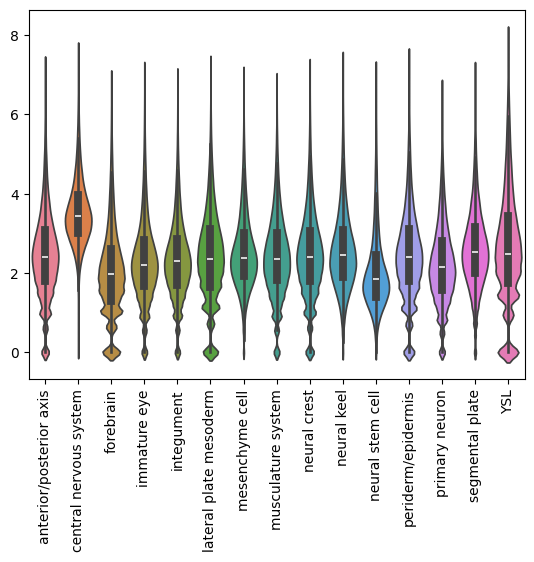

In [8]:
sns.violinplot(peaks)
plt.xticks(rotation = 90)
plt.show()

### Counts of Peaks of Cell Types

In [9]:
peaks.describe()

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
count,171277.000000,171277.000000,171277.000000,171277.000000,171276.000000,171276.000000,171276.000000,171276.000000,171276.000000,171276.000000,171276.000000,171276.000000,171276.000000,171276.000000,171276.000000
mean,2.464772,3.528094,2.018170,2.309103,2.344001,2.397907,2.522446,2.417217,2.446432,2.565338,2.055317,2.432665,2.237179,2.619361,2.619552
std,1.074667,0.837586,1.129922,1.026438,0.980495,1.161993,0.926300,1.027273,1.085667,0.991913,0.990666,1.130028,1.006811,0.978800,1.433922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.789679,2.998886,1.305784,1.680234,1.703114,1.655804,1.915261,1.819059,1.807913,1.898183,1.401331,1.798457,1.559132,1.989127,1.747344
50%,2.395626,3.432581,1.984860,2.197871,2.300787,2.354598,2.376621,2.360297,2.415504,2.442039,1.841349,2.405200,2.141170,2.531056,2.489766
75%,3.081055,3.960253,2.606833,2.833898,2.860317,3.099481,3.004450,3.005098,3.062962,3.090720,2.451874,3.098711,2.812083,3.161576,3.434497
max,7.270597,7.664428,6.907858,7.138944,6.985725,7.268406,7.033311,6.855766,7.201057,7.398556,7.155829,7.462169,6.691781,7.145679,7.960923


### Distributions of Min, Max and Median of Cell Types

### Distributions of standard deviation and coefficient of variation

### Quantile normalization of peaks

In [10]:
import numpy as np

In [11]:
peaks.columns.is_unique

True

In [12]:
df_sorted = pd.DataFrame(np.sort(peaks.values, axis=0), index=peaks.index, columns=peaks.columns)
df_sorted

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171272,7.025411,7.374600,6.790985,6.970090,6.802342,7.064274,6.720398,6.649267,7.012656,7.110326,6.915661,6.978755,6.490264,7.073957,7.884211
171273,7.098769,7.445451,6.796012,7.020105,6.886067,7.119773,6.721271,6.661614,7.103982,7.213888,7.000056,7.047686,6.533037,7.085467,7.935812
171274,7.167753,7.484753,6.880587,7.020755,6.956215,7.260993,6.732973,6.722052,7.197884,7.332518,7.111558,7.182750,6.586213,7.117093,7.943132
171275,7.203635,7.639064,6.905164,7.086172,6.985725,7.268406,7.033311,6.855766,7.201057,7.398556,7.155829,7.462169,6.691781,7.145679,7.960923


In [13]:
df_mean = df_sorted.mean(axis=1)
df_mean

0         0.000000
1         0.000000
2         0.000000
3         0.000000
4         0.000000
            ...   
171272    6.990880
171273    7.044599
171274    7.113148
171275    7.199549
171276    7.245457
Length: 171277, dtype: float64

In [14]:
df_mean.index = np.arange(1, len(df_mean) + 1)
df_mean

1         0.000000
2         0.000000
3         0.000000
4         0.000000
5         0.000000
            ...   
171273    6.990880
171274    7.044599
171275    7.113148
171276    7.199549
171277    7.245457
Length: 171277, dtype: float64

In [15]:
normalized_peaks = quantile_normalize(peaks)
normalized_peaks

,anterior/posterior axis,central nervous system,forebrain,immature eye,integument,lateral plate mesoderm,mesenchyme cell,musculature system,neural crest,neural keel,neural stem cell,periderm/epidermis,primary neuron,segmental plate,YSL
0,4.650974,4.532722,3.770050,4.697050,3.880627,4.779449,4.090406,4.648416,4.487454,4.797271,3.998314,3.646984,3.431168,4.704617,3.645088
1,4.760607,4.709723,3.912640,4.821382,3.756074,4.754943,4.083222,4.552964,4.723565,4.787022,4.127070,3.912640,3.773872,4.777487,3.759995
2,4.846077,4.688154,3.716701,4.343675,3.880627,4.975063,4.211849,4.502474,4.824864,4.679553,3.967448,4.286740,4.925185,4.959922,4.255439
3,4.917624,4.962667,4.510189,4.554880,4.397201,4.909488,4.543986,4.718917,4.681782,4.819180,4.380644,4.520123,4.659135,5.063153,4.097996
4,5.099047,5.144636,4.589925,4.917236,4.723959,5.060401,4.484444,5.059371,5.063966,4.974943,4.420255,4.420255,4.789683,5.260123,4.457056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171272,2.067052,0.985993,0.950699,1.755264,1.666559,0.844620,0.803166,2.750496,1.992195,1.028673,0.499880,1.783038,1.537573,1.097756,2.361737
171273,2.151063,2.024750,1.120038,2.247691,1.661181,0.844620,1.333693,1.795211,2.341915,1.541942,1.638313,2.268933,2.661949,0.678262,2.398174
171274,1.594529,1.279934,2.027047,0.725408,1.976961,0.844620,1.992195,2.565531,1.901846,1.028673,1.486564,3.502195,0.985993,1.373231,1.723122
171275,2.750496,1.774631,2.583085,2.116087,0.380487,1.988129,2.339066,2.426527,2.197475,1.437091,2.271281,3.551280,2.715586,2.027047,2.054341


/tmp/ipykernel_1135182/3718688544.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
/tmp/ipykernel_1135182/3718688544.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)


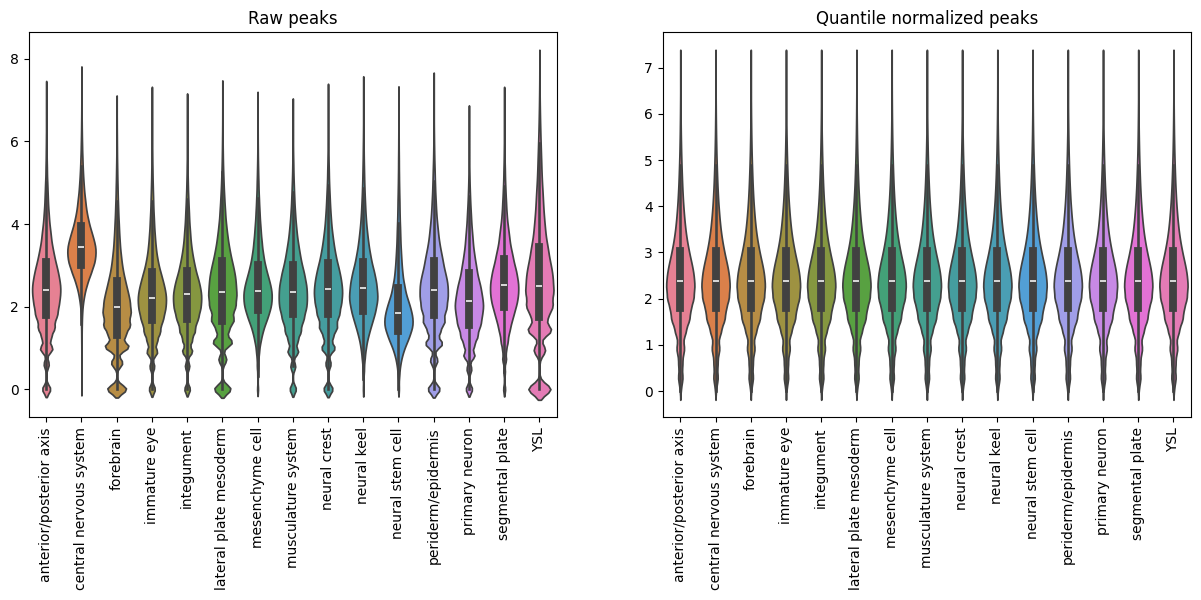

In [16]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.violinplot(peaks, ax = ax[0])
ax[0].set_title('Raw peaks')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)
sns.violinplot(normalized_peaks, ax = ax[1])
ax[1].set_title('Quantile normalized peaks')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)
plt.show()

In [17]:
normalized_peaks.to_csv('../data/normalized_peaks.csv', index = False)

## Analyzing BED file

In [18]:
bed_data = pd.read_csv("../data/chromosomes.10hpf.bed", sep = '\t', header = None)
bed_data.columns = ['chrom', 'start', 'end', 'name', 'score', 'strand']

In [19]:
bed_data.head()

,chrom,start,end,name,score,strand
0,chr1,5231,5732,.,0,.
1,chr1,5786,6287,.,0,.
2,chr1,10087,10588,.,0,.
3,chr1,10990,11491,.,0,.
4,chr1,11894,12395,.,0,.


In [20]:
bed_data.describe()

,start,end,score
count,3.700580e+05,3.700580e+05,370058.0
mean,2.712686e+07,2.712736e+07,0.0
std,1.689309e+07,1.689309e+07,0.0
min,3.600000e+01,5.370000e+02,0.0
25%,1.321669e+07,1.321719e+07,0.0
50%,2.621427e+07,2.621477e+07,0.0
75%,3.948675e+07,3.948725e+07,0.0
max,7.808975e+07,7.809026e+07,0.0


In [21]:
bed_data['score'].unique

<bound method Series.unique of 0         0
1         0
2         0
3         0
4         0
         ..
370053    0
370054    0
370055    0
370056    0
370057    0
Name: score, Length: 370058, dtype: int64>